### Web Scraping - Top 250 Movies from IMDb

In [2]:
# Importing URL
import requests

r = requests.get('https://www.imdb.com/chart/top/?ref_=nv_mv_250')

In [3]:
# Importing BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

In [4]:
# Extracting and cleaning the data
result_1 = soup.find_all('td', attrs={'class':'posterColumn'})
result_2 = soup.find_all('td', attrs={'class':'titleColumn'})

In [5]:
# First value of column Rank
first_ranking = result_1[0]
first_ranking.find('span', attrs={'name':'rk'})['data-value']

'1'

In [6]:
# First value of column Rating
first_rating = result_1[0]
first_rating.find('span', attrs={'name':'ir'})['data-value']

'9.233878831083254'

In [7]:
# First value of column Number of Votes
first_number_voting = result_1[0]
first_number_voting.find('span', attrs={'name':'nv'})['data-value']

'2596800'

In [8]:
# First value of column Year
first_year = result_2[0]
first_year.find('span', attrs={'class':'secondaryInfo'}).text.replace('(','').replace(')','')

'1994'

In [9]:
# First value of column Title
first_title = result_2[0]
first_title.find('a').text

'Um Sonho de Liberdade'

In [10]:
# First value of column Description
first_descr = result_2[0]
first_descr.find('a')['title']

'Frank Darabont (dir.), Tim Robbins, Morgan Freeman'

In [11]:
# Function to extract all data 
movies = []
for a, b in zip(result_1, result_2):
    ranking = int(a.find('span', attrs={'name':'rk'})['data-value'])
    rating = float(a.find('span', attrs={'name':'ir'})['data-value'])
    number_rating = int(a.find('span', attrs={'name':'nv'})['data-value'])
    title = b.find('a').text
    description = b.find('a')['title']
    year = int(b.find('span', attrs={'class':'secondaryInfo'}).text.replace('(','').replace(')',''))
    movies.append((ranking, title, description, year, rating, number_rating))

In [12]:
# Number of rows(movies)
len(movies)

250

In [13]:
# Showing the 3 first movies
movies[0:3]

[(1,
  'Um Sonho de Liberdade',
  'Frank Darabont (dir.), Tim Robbins, Morgan Freeman',
  1994,
  9.233878831083254,
  2596800),
 (2,
  'O Poderoso Chefão',
  'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino',
  1972,
  9.15583294062378,
  1792137),
 (3,
  'Batman: O Cavaleiro das Trevas',
  'Christopher Nolan (dir.), Christian Bale, Heath Ledger',
  2008,
  8.985326312714562,
  2567967)]

In [14]:
# Creating a table for the data extract
import pandas as pd
df = pd.DataFrame(movies, columns=['Ranking', 'Title', 'Description', 'Year', 'Rating', 'Number_of_votes'])

In [15]:
# Turning the column Ranking as the index
df = df.set_index(['Ranking'])
df['Rating'] = round(df['Rating'], 1)

In [16]:
# A sample of the movies table
df.head()

,Title,Description,Year,Rating,Number_of_votes
Ranking,,,,,
1,Um Sonho de Liberdade,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",1994,9.2,2596800
2,O Poderoso Chefão,"Francis Ford Coppola (dir.), Marlon Brando, Al...",1972,9.2,1792137
3,Batman: O Cavaleiro das Trevas,"Christopher Nolan (dir.), Christian Bale, Heat...",2008,9.0,2567967
4,O Poderoso Chefão II,"Francis Ford Coppola (dir.), Al Pacino, Robert...",1974,9.0,1235714
5,12 Homens e uma Sentença,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",1957,8.9,767212


In [35]:
df.describe()

,Year,Rating,Number_of_votes
count,250.000000,250.000000,2.500000e+02
mean,1986.456000,8.254800,6.190587e+05
std,25.214423,0.235582,5.007230e+05
min,1921.000000,8.000000,2.857400e+04
25%,1966.250000,8.100000,2.096802e+05
50%,1994.000000,8.200000,4.811380e+05
75%,2006.750000,8.400000,9.342108e+05
max,2022.000000,9.200000,2.596800e+06


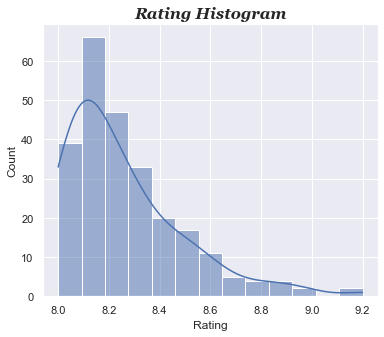

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plots settings
plt.figure(figsize=(6, 5))
sns.set_theme(color_codes=True)

# Plotting Rating Histogram
sns.histplot(df.Rating, kde=True)
plt.title('Rating Histogram', fontdict={'fontweight':'bold', 'fontsize':16, 'family':'Georgia', 'style':'italic'})
plt.xlabel('Rating')
plt.show;

- 75% of the movies have a rating between 8.0 and 8.4

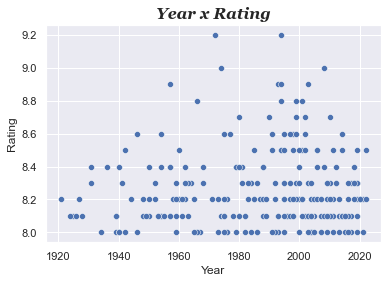

In [33]:
# Plotting Year x Rating 
sns.scatterplot(x=df.Year, y=df.Rating)
plt.title('Year x Rating', fontdict={'fontweight':'bold', 'fontsize':16, 'family':'Georgia', 'style':'italic'})
plt.show;

- The major movies with Rating equal or higher than 8.5 was made after 1970.